In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [25]:
data_1 = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")

In [30]:
data_1.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


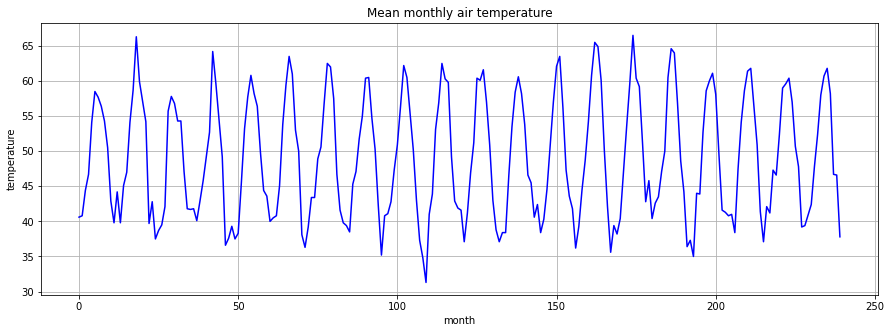

In [26]:
plt.figure(figsize=(15,5))
plt.plot(data_1['Deg'], color='blue')
plt.title('Mean monthly air temperature')
plt.xlabel('month')
plt.ylabel('temperature')
plt.grid()
plt.show()

Скорее всего, ряд является стационарным. Однако данное утверждение следует проверить с помощью формального теста.

In [27]:
adfuller(data_1['Deg'], autolag='AIC')[1]

0.016989030222608826

p-value составляет 0.02, следовательно, можно отвергнуть нулевую гипотезу о нестационраности ряда, и считать ряд стационарным.

Так как данный ряд оказался стационарным, возьмем другой ряд.

In [24]:
data_2 = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")

In [29]:
data_2.head()

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


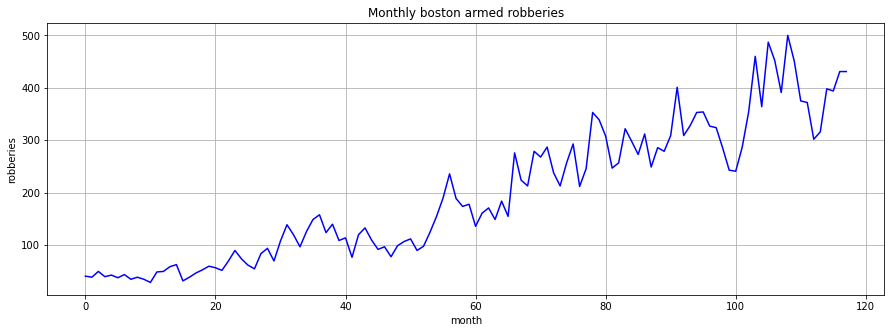

In [28]:
plt.figure(figsize=(15,5))
plt.plot(data_2['Count'], color='blue')
plt.title('Monthly boston armed robberies')
plt.xlabel('month')
plt.ylabel('robberies')
plt.grid()
plt.show()

В данном временном ряду точно присутвуют тренд и гетероскедастичность. Наличие сезонности и цикличности под вопросом.

In [31]:
adfuller(data_2['Count'], autolag='AIC')[1]

0.9942775638057231

Ну, как бы да, все видно.

 Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

In [39]:
data_2_1 = boxcox(data_2['Count'], 0)

In [41]:
adfuller(data_2_1, autolag='AIC')[1]

0.2808325035425546

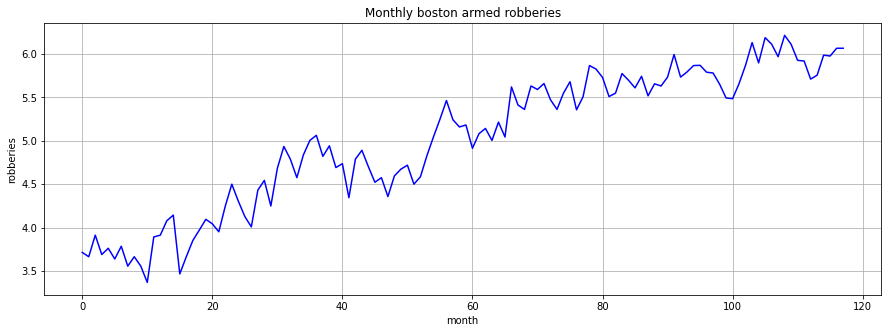

In [43]:
plt.figure(figsize=(15,5))
plt.plot(data_2_1, color='blue')
plt.title('Monthly boston armed robberies')
plt.xlabel('month')
plt.ylabel('robberies')
plt.grid()
plt.show()

По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [44]:
data_2_2 = data_2_1[1:] - data_2_1[:-1]

In [45]:
adfuller(data_2_2, autolag='AIC')[1]

2.3786024417438203e-11

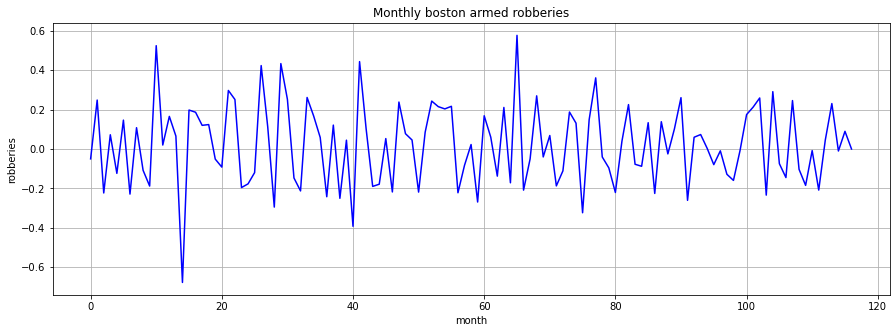

In [46]:
plt.figure(figsize=(15,5))
plt.plot(data_2_2, color='blue')
plt.title('Monthly boston armed robberies')
plt.xlabel('month')
plt.ylabel('robberies')
plt.grid()
plt.show()

Теперь все хорошо ;)